In [1]:
import tushare as ts
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = ["SimHei"] # 设置字体
plt.rcParams["axes.unicode_minus"] = False # 该语句解决图像中的“-”负号的乱码问题

In [2]:
# 设置TuShare的token，需要提前在TuShare官网注册并获取token
token = "53b6254438e6d307b6799dbd575883528bc1da912f3d6a31159ecc9e"
ts.set_token(token)

# 初始化Tushare客户端
pro = ts.pro_api()

In [3]:
# 获取比亚迪（002594.SZ）和中际旭创（300308.SZ）的历史日线数据
byd_data = pro.daily(ts_code='002594.SZ', start_date='20200101', end_date='20211231')
zjxc_data = pro.daily(ts_code='300308.SZ', start_date='20200101', end_date='20211231')

In [4]:
# 提取收盘价数据
byd_close = byd_data['close']
zjxc_close = zjxc_data['close']

In [5]:
# 合并两只股票的收盘价数据
data = pd.concat([byd_close, zjxc_close], axis=1)
data.columns = ['BYD', 'ZJXC']
data

,BYD,ZJXC
0,268.12,42.50
1,267.13,43.39
2,269.00,43.00
3,270.85,42.50
4,267.03,42.22
...,...,...
481,47.28,51.08
482,48.05,52.42
483,48.28,52.03
484,48.04,52.88


In [6]:
# 进行协整合分析
model = sm.OLS(data['BYD'], sm.add_constant(data['ZJXC'])).fit()
spread = data['BYD'] - model.params['ZJXC'] * data['ZJXC'] - model.params['const']

In [7]:
# 计算协整关系的ADF检验统计量
adf_statistic = sm.tsa.adfuller(spread, maxlag=1)[0]

In [8]:
# 设置显著性水平
alpha = 0.05

In [16]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname="/Users/minkexiu/Documents/GitHub/ML_Tryout/SimHei.ttf", size=24)  

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/opt/anaconda3/envs/ml12/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing 

不存在协整关系或ZJXC不是比亚迪的领先指标
协整关系检验ADF统计量: -2.370578419902043
OLS回归参数：
const    472.497598
ZJXC      -6.312554
dtype: float64


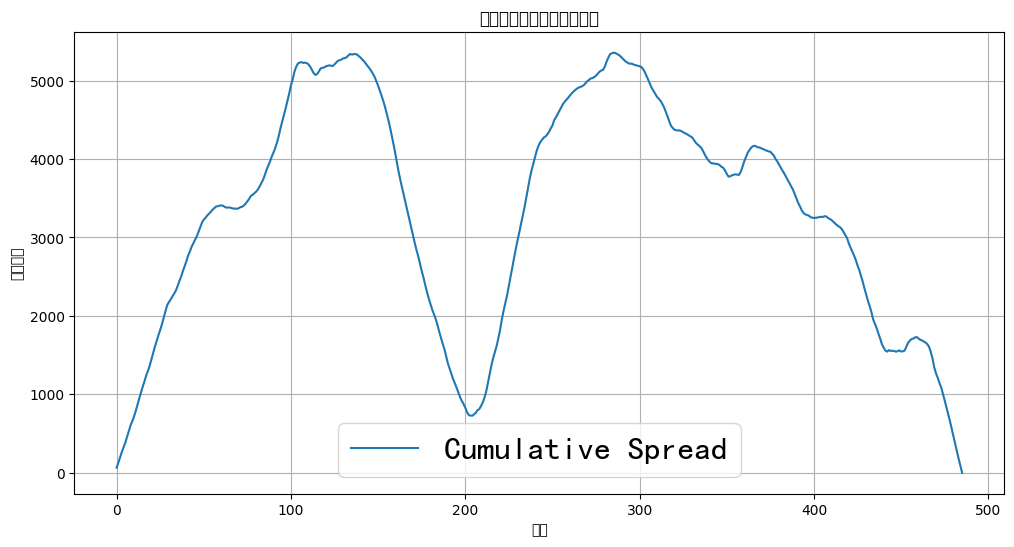

In [17]:
# 输出协整关系检验结果
if adf_statistic < sm.tsa.adfuller(spread, maxlag=1)[4]['5%'] and model.params['ZJXC'] < 0:
    print("存在协整关系，且ZJXC为比亚迪的领先指标")
    print("协整关系检验ADF统计量:", adf_statistic)
    print("OLS回归参数：")
    print(model.params)
else:
    print("不存在协整关系或ZJXC不是比亚迪的领先指标")
    print("协整关系检验ADF统计量:", adf_statistic)
    print("OLS回归参数：")
    print(model.params)
 
# 绘制收益曲线
plt.figure(figsize=(12, 6))
plt.plot(data.index, np.cumsum(spread), label='Cumulative Spread')
plt.xlabel('日期')
plt.ylabel('累积差价')
plt.title('比亚迪和中际旭创协整关系')
plt.legend()
plt.grid(True)
plt.show()
